In [ ]:
# Students ID
# Yarden Dahan 208730523  
# Tor Hanan 205665862

#  Dataset Preprocessing

---


*   A good dataset is a key for successful model training.

*   This assignment guides you how to create two labeled datasets, which could later be used for
supervised learning.

---

## Overview

Image augmentations are used to increase the variability and robustness of a dataset

## Goals - Create a larger dataset from a smaller one



---


### Goals
1. 

  *   The original MNIST dataset includes images of single digits, in ten classes.
  *   Your goal is to create a new three-digit image dataset, with 101 classes, based on the original MNIST dataset.
2. 

  *   Create a dataset of shape images with three classes: (Triangle, Rectangle and Circle/Elipse)


---

### Tasks

1 - MNIST</br>
*  Download the mnist data usin the code snippet below </br> 
<code> import torchvision </br>
mnist_data = torchvision.datasets.MNIST(root='', download=True) </br>
this downloads the data to root ('') folder. Change the root to a convenient location. </code>
*  Show at least 5 samples of each class (0-9). Always add proper titles and choose the correct color
map
* Your new dataset should include the three-digits numbers: [000, 001, ..., 055, ..., 099, 100],
forming 101 classes. </br>
* Each class should have at least 4000 different samples. </br>
* Use the augmentations you created on lab 3 on your new dataset and show some results and
explain which augmentations are applicable to this specific dataset, which are not and why. </br>
* Each student should add about 10 new augmentations (you may use OpenCV). The total number
of augmentations will be 15. </br>
* Display typical results of your dataset, demonstrating the variability of the new dataset. </br>
* Write a detailed summary of your work.

2 - Shapes Dataset
* Shapes definition and functions requirements:
  * Minimal and maximal area: 100-600 pixels, the shape could not be cropped by image
boundaries.
  * Each shape will have random size, location, orientation and color.
  * Each image will include one of the following shapes:
    * Triangle
    * Rectangle
    * Circle/Elipse
  * Each image should be of dimensions 50x50x3.
  * Create at least 300 different samples of each class i.e.(circles with different radius, etc..)
  * Show the images you created without augmentations and with the augmentations from lab 3
  * Write a class, which loads the data you created, labels the data, i.e (triangle will be class 0,
rectangle 1, etc.. an Integer) and splits it to train and test sets. 90% of the data should be train
images and 10% test images. The class call should be as follows: 


3 - Summary
  * Write a short summary of everything you've done in this work


# Imports

In [ ]:
# imports 
# Add the missing imports.
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
from scipy.signal import  convolve2d
from torch.utils.data import dataset
from torchvision import transforms
from PIL import Image
from matplotlib import cm
import numpy.fft as fft
import random
import math
from sklearn.model_selection import train_test_split

plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["legend.title_fontsize"] = 20

# Load Original Mnist Data

In [ ]:
mnist_data = torchvision.datasets.MNIST(root='', download=True, train=True);

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
# Acessing the data within
images = mnist_data.data.numpy()
labels = mnist_data.targets.numpy()
print(images.shape) #60K Images with Dimension 28X28
print(labels.shape)
print(f"There are {len(mnist_data.classes)} which are {mnist_data.classes}")

(60000, 28, 28)
(60000,)
There are 10 which are ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Text(0.5, 1.0, 'Label = 5')

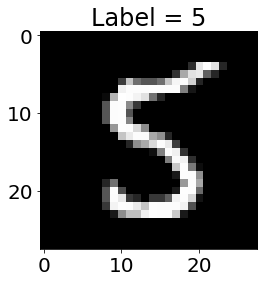

In [ ]:
# Plot a random num
plt.rcParams["figure.figsize"] = (8, 4)
rand_indx = np.random.randint(len(images))
plt.imshow(images[rand_indx], cmap="gray")
plt.title(f"Label = {labels[rand_indx]}")

# Visualisation

In [ ]:
def plot_batch(batch, row=2, col=2, channel_first=True):
    if isinstance(batch, tuple) or isinstance(batch, list):
        imgs, tars = batch
    else:
        imgs, tars = batch, None
    plt.figure(figsize=(col*3, row*3))
    for i in range(row*col):
        plt.subplot(row, col, i+1)
        img = imgs[i]
        if channel_first:
            img = img.transpose((1, 2, 0))
        plt.imshow(img, cmap='gray')
        if tars is not None:
            plt.title(f'Label={tars[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def create_manual_batch(digit, labels_array, batch_size=5):
  return np.where(labels_array == digit)[0][:batch_size]

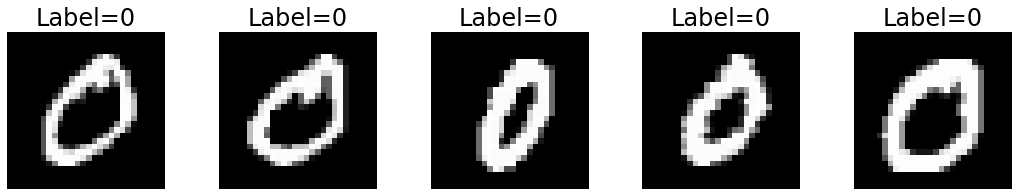

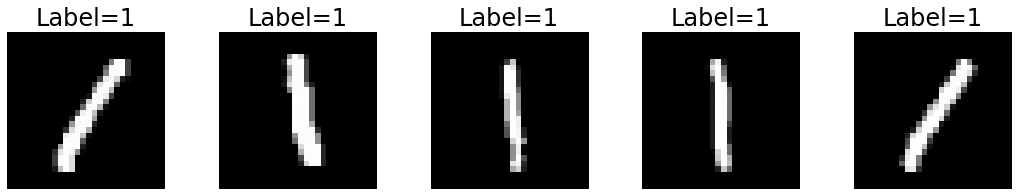

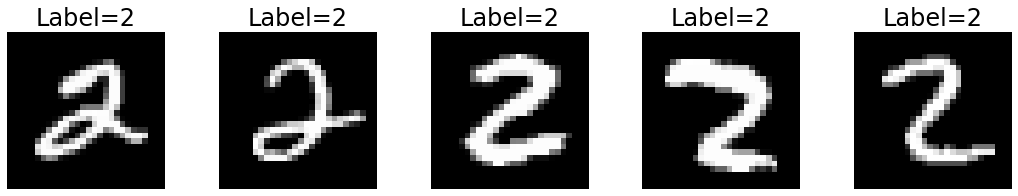

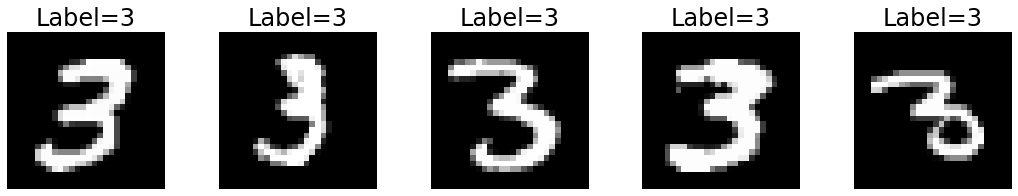

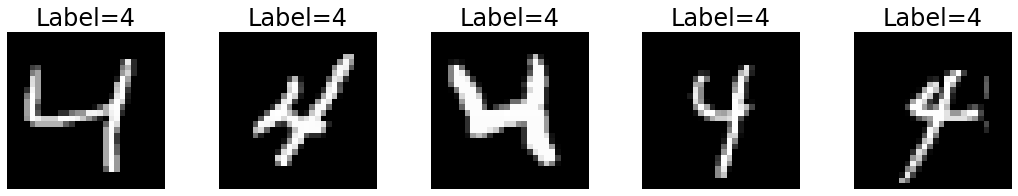

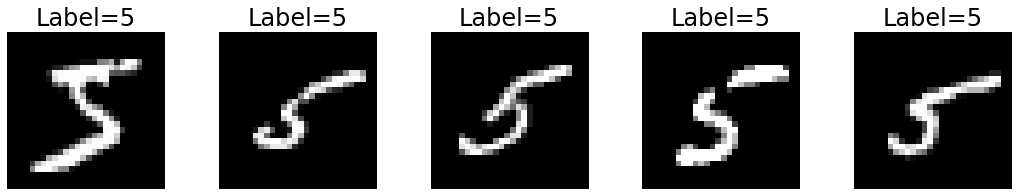

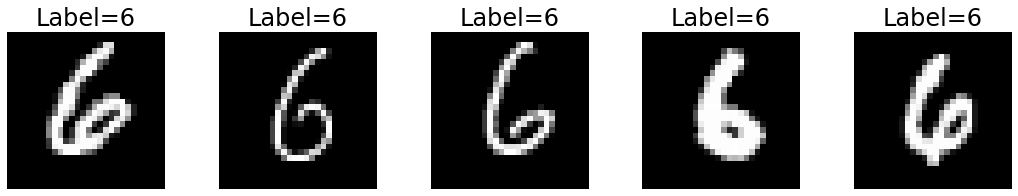

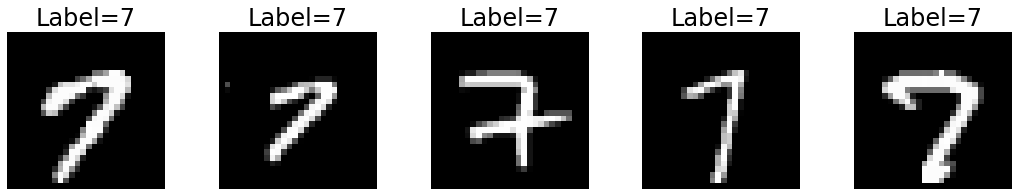

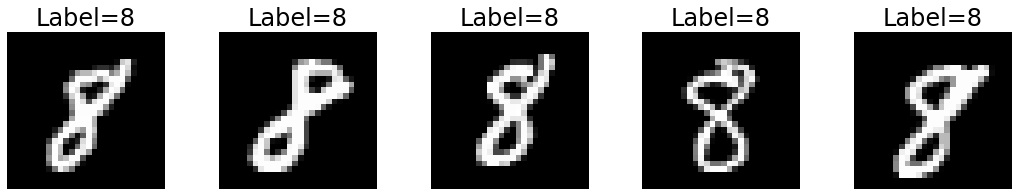

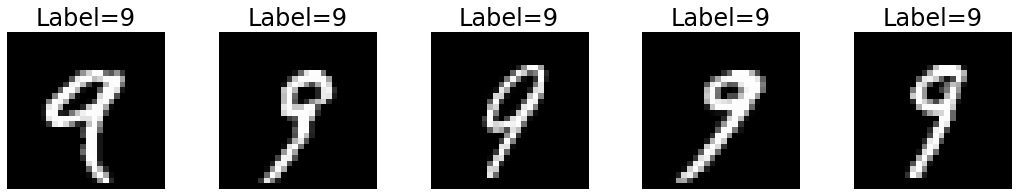

In [ ]:
max_label = 9
for i in range(max_label+1):
  indicies = create_manual_batch(i, labels)
  tple = (np.take(images,indicies, axis=0),np.take(labels,indicies, axis=0))
  plot_batch(tple, row=1, col=5, channel_first=False)

# Concatenation:
  here we are demonstrate on one image how the concatanation will work.

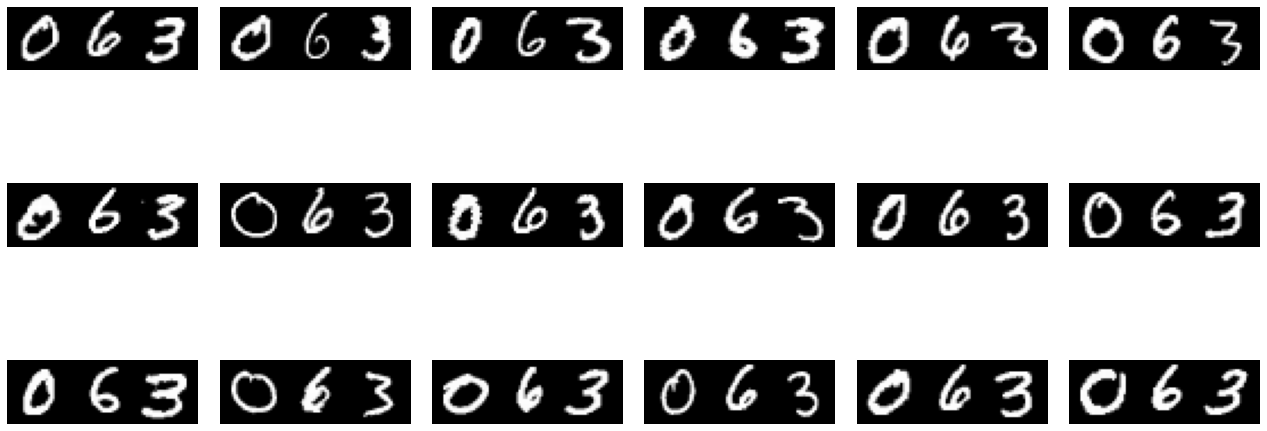

In [ ]:
import torch
indicies0 = create_manual_batch(0,labels, 4000)
indicies1 = create_manual_batch(6,labels, 4000)
indicies2 = create_manual_batch(3,labels, 4000)

imgs0 = (np.take(images,indicies0, axis=0))
imgs1 = (np.take(images,indicies1, axis=0))
imgs2 = (np.take(images,indicies2, axis=0))


concate_img = np.dstack((imgs0, imgs1, imgs2))

plot_batch(concate_img[:18], row=3, col=6, channel_first=False)

# Create New samples


> Implement the concate above on the whole dataset




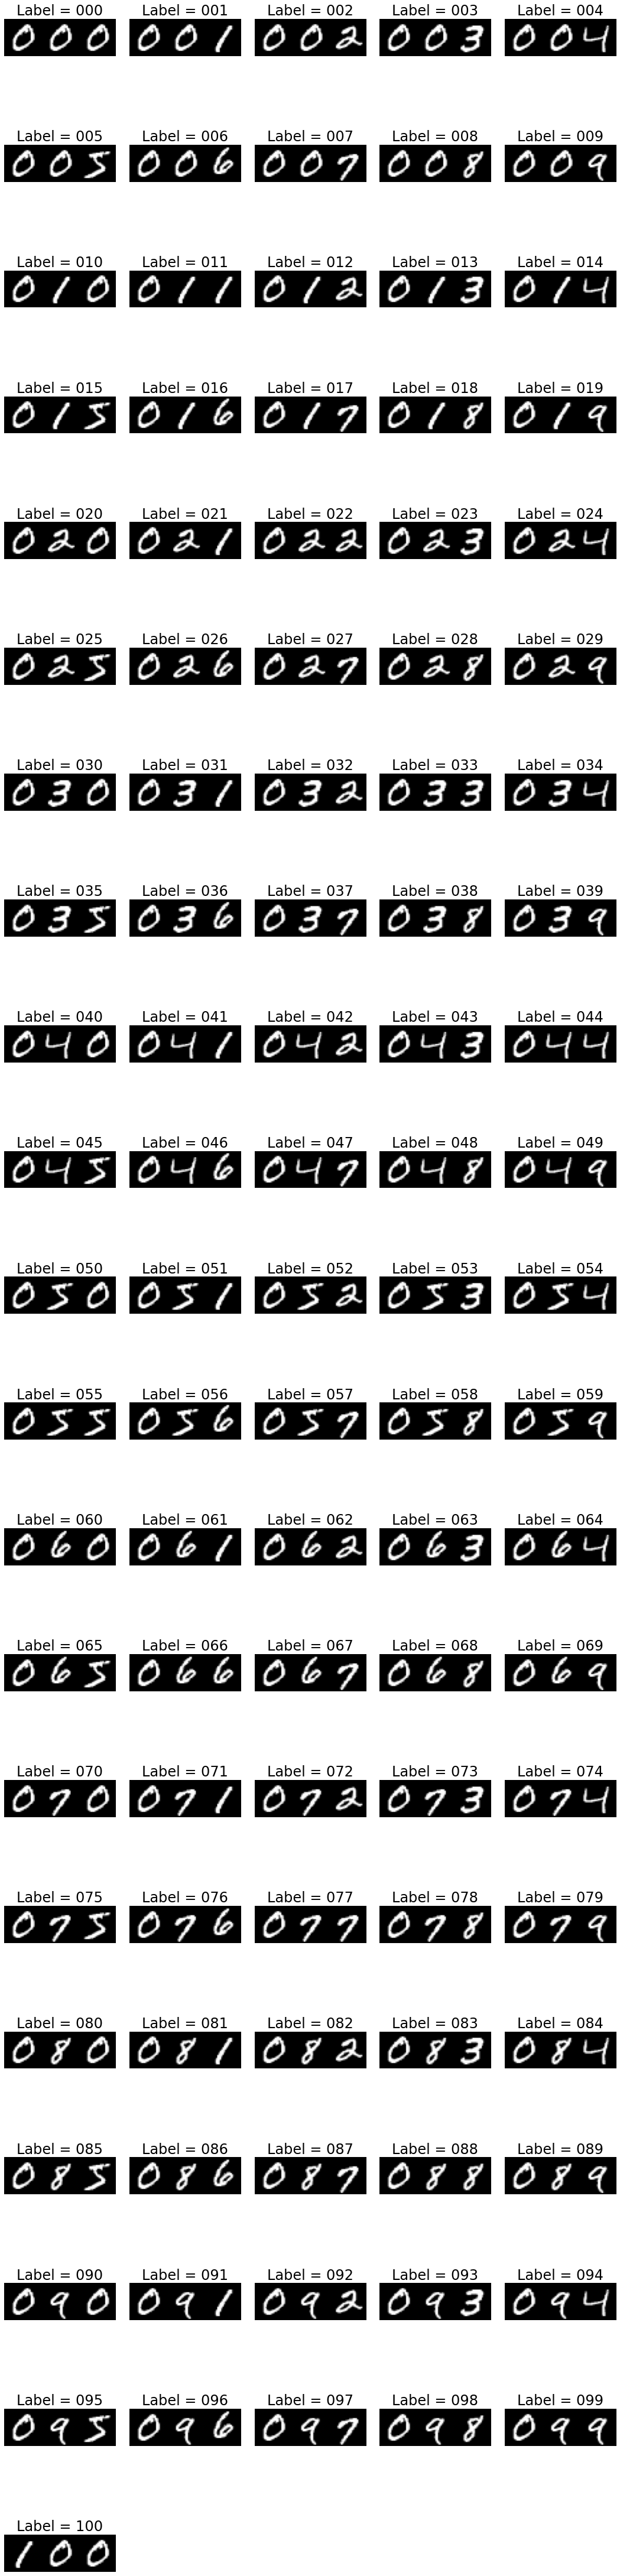

In [ ]:
max_label = 100
total_size = 404000
sample_size = 4000
dataset_labels = np.ndarray(shape= total_size,dtype =np.uint8)
dataset_images = np.ndarray(shape= (total_size,28,84))
row = 21
col = 5
plt.figure(figsize=(col*3, row*3))
for i in range(max_label+1):
  lsb = i%10
  mid =(i//10)%10
  msb = (i//100)%10
  #get indicies of the digits
  indicies0 = create_manual_batch(msb,labels,sample_size)
  indicies1 = create_manual_batch(mid,labels,sample_size)
  indicies2 = create_manual_batch(lsb,labels,sample_size)
  #create new label 
  label = '' + str(msb) + str(mid) + str(lsb)

  imgs0 = (np.take(images,indicies0, axis=0))
  imgs1 = (np.take(images,indicies1, axis=0))
  imgs2 = (np.take(images,indicies2, axis=0))

  concate_img = np.dstack((imgs0, imgs1, imgs2))
  plt.subplot(row, col, i+1)
  plt.title(f'Label = {label}')
  plt.axis('off')
  plt.imshow(concate_img[0], cmap='gray')

  curr_idx =i*sample_size
  dataset_images[curr_idx:curr_idx+sample_size] = concate_img
  dataset_labels[curr_idx:curr_idx+sample_size] = label

plt.tight_layout()
plt.show()

In [ ]:
def get_shape(image):
  z = None
  if AugUtils.d3_image: 
    height, width,z = image.shape
  else: 
    height, width = image.shape
  return height, width, z
class Kernels():

  def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
      [0, 0, 1]])
    
  def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
      ])
    
  def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])


  def get_shear(h_shear=0, v_shear=0):
     return np.array([
        [1, h_shear, 0],
        [v_shear, 1, 0],
        [0,   0,   1]
    ])

  def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

  def apply_kernel(img, kernel):
    height, width,z = get_shape(img)
    coords = Kernels.get_grid(width, height, True)
    x_ori, y_ori = coords[0], coords[1]

    # Apply transformation
    warp_coords = np.round(kernel@coords).astype(np.int32)
    xcoord2, ycoord2 = warp_coords[0, :], warp_coords[1, :]

    # Get pixels within image boundary
    indices = np.where((xcoord2 >= 0) & (xcoord2 < width) & (ycoord2 >= 0) & (ycoord2 < height))
    xpix2, ypix2 = xcoord2[indices], ycoord2[indices]
    xpix, ypix = x_ori[indices].astype(int), y_ori[indices].astype(int)

    # Map the pixel RGB data to new location in another array
    canvas = np.zeros_like(img)
    canvas[ypix, xpix] = img[ypix2, xpix2]
    return canvas


# Augmantaions:


* median
* gaussian
* rotate
* flip
* sharpenning

## Additional Augmantaion:
* zoom-in/out 
* vertical_Shear 
* Horizontal_shear 
* Translation 
* Bars 
* white padding 
* transforms.ColorJitter(contrast=2) 
* adding gaussian noise 
* adding salt&pepper noise 
* edage detection 
* cut-out

In [ ]:
class AugUtils():
  d3_image = False
  def calc_padding(dim_out, dim_in, kernel_size):
    return int(np.ceil((dim_out - dim_in + kernel_size) / 2) - 1)
  def convolve_image(img, filter, mode = 'same'):
    if not AugUtils.d3_image:
      return convolve2d(img,filter,mode)
    for i in range(img.shape[-1]):
      img[:,:,i] = convolve2d(img[:,:,i], filter, mode)
    return img

  def median_single_channel(img, kernel_size):
    pad_h,pad_w = AugUtils.calc_padding(img.shape[0], img.shape[0], kernel_size),AugUtils.calc_padding(img.shape[1], img.shape[1], kernel_size)
    padded_img = np.pad(img,[pad_h,pad_w])
    #output like the image input
    res = np.zeros_like(img)
    for row in range(res.shape[0]):
      for col in range(res.shape[1]):
         res[row,col] = np.median(padded_img[row:row+kernel_size,col:col+kernel_size])
    return res


  def get_gaussian_filter(kernel_size, sigma, sig_range=1):
    space = np.linspace(-sig_range,sig_range,kernel_size)
    xx, yy = np.meshgrid(space,space)  
    gaussian = 1/(2*np.pi*sigma**2)*np.exp(-1*(xx**2+yy**2)/(2*sigma**2))
    return gaussian / gaussian.sum()
  

  def flip(img,h= True):
    if h is True:
      return img[::,::-1]
    return img[::-1,::]
  

  def shear_img(img, h_shear=0, v_shear=0):
    height, width,z = get_shape(img)
    tx, ty = np.array((width // 2, height // 2))

    T = Kernels.get_translation(tx,ty)
    S = Kernels.get_shear(h_shear, v_shear)
    A = T @ S @ np.linalg.inv(T)

    return Kernels.apply_kernel(img, A)

    
  def translation_img(img, tx, ty):
    T = Kernels.get_translation(tx, ty)
    return Kernels.apply_kernel(img, T)


  def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    height, width,z = get_shape(img)
    tx, ty = np.array((width // 2, height // 2))

    T = Kernels.get_translation(tx,ty)
    R = Kernels.get_rotation(angle)

    # Because the origin is 0 and we want to rotate around the center we use translation 
    A = T @ R @ np.linalg.inv(T)
    return Kernels.apply_kernel(img, A)


  def zoom_img(img,  zoom=1.0):

    height, width,z = get_shape(img)

    tx, ty = np.array((width // 2, height // 2))

    T = Kernels.get_translation(tx,ty)
    Z = Kernels.get_scale(zoom)
    A = T @ Z @ np.linalg.inv(T)

    return Kernels.apply_kernel(img, A)


  def sharp_Image(img, kernel_size, alpha = 1):
    #Create a matrix from which we can obtain the original image by convolving it with the matrix
    original = np.zeros((kernel_size,kernel_size))
    original[kernel_size//2,kernel_size//2] = 1
    # Create a matrix that represents the low pass filter
    lp_filter = np.ones((kernel_size,kernel_size),dtype = 'float')/(float(kernel_size**2))
    # Create high pass filter by subtracting low pass filter from original matrix (delta)
    hp_filter = (original-lp_filter)
    hp_filter = hp_filter*alpha
    # The sharpen image will be created by adding the original image to the result and convolving it with a high pass filter
    convolved = AugUtils.convolve_image(img,hp_filter,mode = 'same')
    sharp_img = img + np.abs(convolved)
    return sharp_img
    
  
  def add_guassian_noise(img: np.ndarray, mean: float, sigma: float) -> np.ndarray:
    # 1.create random gaussian distribution floating number
    h,w,z = get_shape(img)
    if z is None:
      gaussian = sigma * np.random.randn(h,w)+ mean
    else:
      gaussian = sigma * np.random.randn(h,w,z)+ mean
    # 2. Add the noise to Idle image
    noised_image = img + gaussian
    return noised_image


  def add_salt_pepper_noise(image):
    row,col,z = get_shape(image)

    s_vs_p = 0.5 
    amount = 0.1
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out


  def cutout_img(img):
    min_area = 100
    max_area = 600
    ylim, xlim,z = get_shape(img)
    area = min_area-1

    while min_area > area or area > max_area:
      x1 =  np.random.randint(0,xlim)
      x2 =  np.random.randint(0,xlim)
      y1 =  np.random.randint(0,ylim)
      y2 =  np.random.randint(0,ylim)
      area = np.abs((y2-y1)*(x2-x1))

    return cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,0), -1)


  def color_augmentaion(img):
    im = Image.fromarray(np.uint8(cm.gist_earth(img)*255))
    loader_transform2 = transforms.ColorJitter(contrast=2)
    img1= loader_transform2(im)
    return np.asarray(img1)
  
  def add_bars(img, f,phi = 0):
    h,w,z = get_shape(img)

    x =np.linspace(0, 1, h)
    y = 0.75 * np.cos(2 * np.pi* f * x + phi) / 2  + 0.625
    bars = np.repeat(y, w).reshape(h, w)    
    if z is None:
      img = bars * img
    else:
      for i in range(img.shape[-1]):
        img[:,:,i] = bars * img[:,:,i]
    # fft_locked_img = fft.fft2(locked_img)
    # mag = np.abs(fft_locked_img)
    # return fft.fftshift(10 * np.log10(mag**2 + 1))
    return img
  

  def edge_detect(img,threshold1 = 1, threshold2 = 1):
    return cv2.Canny(np.uint8(img),threshold1,threshold2)


## Example for implementaion of the augmantaions:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


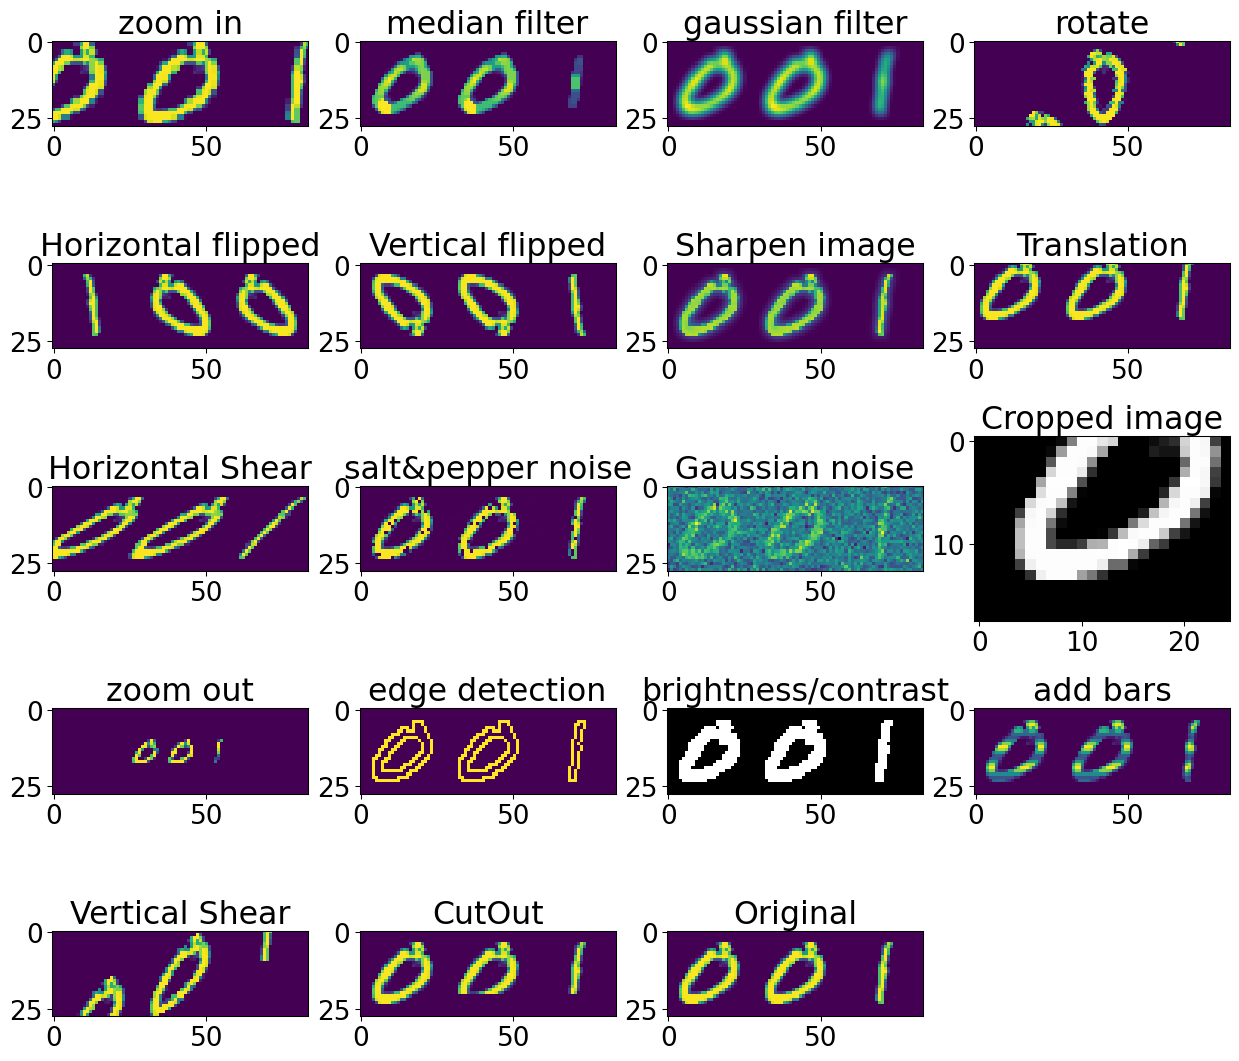

In [ ]:
img1 = dataset_images[np.random.randint(0,40400)]
row = 5
col = 4
plt.figure(figsize=(col*4, row*3), dpi = 95)
# zoom out
plt.subplot(row, col, 1)
new_img1 = AugUtils.zoom_img(img1, 0.75) 
plt.title("zoom in")
plt.imshow(new_img1)
# median
plt.subplot(row, col, 2)
new_img1 = AugUtils.median_single_channel(img1, kernel_size=5) 
plt.title("median filter")
plt.imshow(new_img1)
# gaussian
plt.subplot(row, col, 3)
new_img1 = AugUtils.convolve_image(img1, AugUtils.get_gaussian_filter(5,0.8), mode='same') 
plt.title("gaussian filter")
plt.imshow(new_img1)
# rotate
plt.subplot(row, col, 4)
new_img1 = AugUtils.rotate_image(img1, 45.0) 
plt.title("rotate")
plt.imshow(new_img1)
# Hflip
plt.subplot(row, col, 5)
new_img1 = AugUtils.flip(img1) 
plt.title("Horizontal flipped")
plt.imshow(new_img1)
# Vflip
plt.subplot(row, col, 6)
new_img1 = AugUtils.flip(img1, h = False) 
plt.title("Vertical flipped")
plt.imshow(new_img1)
# sharpen
plt.subplot(row, col, 7)
new_img1 = AugUtils.sharp_Image(img1,5,.6) 
plt.title("Sharpen image")
plt.imshow(new_img1)
# translation
plt.subplot(row, col, 8)
new_img1 = AugUtils.translation_img(img1, 2,5)
plt.title("Translation")
plt.imshow(new_img1)
# scale
plt.subplot(row, col, 9)
new_img1 = AugUtils.shear_img(img1, 0.9)
plt.title("Horizontal Shear")
plt.imshow(new_img1)
# salt&pepper noise
plt.subplot(row, col, 10)
new_img1 = AugUtils.add_salt_pepper_noise(img1)
plt.title("salt&pepper noise")
plt.imshow(new_img1)
#gaussian noise
plt.subplot(row, col, 11)
new_img1 = AugUtils.add_guassian_noise(img1,0.5,100)
plt.title("Gaussian noise")
plt.imshow(new_img1)
#crop
plt.subplot(row, col, 12)
cropped_img = img1[10: 30,0:25]
plt.title("Cropped image")
plt.imshow(cropped_img, cmap='gray')
# zoom in
plt.subplot(row, col, 13)
new_img1 = AugUtils.zoom_img(img1, 2.4) 
plt.title("zoom out")
plt.imshow(new_img1)
# edge detection
plt.subplot(row, col, 14)
new_img1 = AugUtils.edge_detect(img1)
plt.title("edge detection")
plt.imshow(new_img1)
# brightness/contrast
plt.subplot(row, col, 15)
new_img1 = AugUtils.color_augmentaion(img1)
plt.title("brightness/contrast")
plt.imshow(new_img1)
# fourier transform
plt.subplot(row, col, 16)
new_img1 = AugUtils.add_bars(img1, 50, phi=5)
plt.title("add bars")
plt.imshow(new_img1)

plt.subplot(row, col, 17)
new_img1 = AugUtils.shear_img(img1, v_shear=0.5) 
plt.title("Vertical Shear")
plt.imshow(new_img1)

plt.subplot(row, col, 18)
new_img1 = img1.copy()
new_img1 = AugUtils.cutout_img(new_img1) 
plt.title("CutOut")
plt.imshow(new_img1)

plt.subplot(row, col, 19)
plt.title("Original")
plt.imshow(img1)

## Implementation of Random Augmantation

In [ ]:

def random_augmantation(data,num = -1):
  for i in range(len(data)):
    img = data[i] if num == -1 else data
    aug_num = np.random.randint(0,14) if num == -1 else num

    if aug_num == 0:
      kernel_size = random.randrange(3, 15+1, 2)
      data[i] = AugUtils.median_single_channel(img, kernel_size)

    elif aug_num == 1:
      kernel_size = random.randrange(3, 15+1, 2)
      sig = random.uniform(0,1)
      data[i] = AugUtils.convolve_image(img, AugUtils.get_gaussian_filter(kernel_size, sig), mode='same') 

    elif aug_num == 2:
      boolean = True if i%2==0 else False
      data[i] = AugUtils.flip(img, boolean)

    elif aug_num == 3:
      shear = random.uniform(0.2,1.5)
      v_shear = random.uniform(0.1,0.3)

      data[i] = AugUtils.shear_img(img,h_shear=shear) if i%2==0 else AugUtils.shear_img(img,v_shear=v_shear)

    elif aug_num == 4:
      tx = random.uniform(0.,2.)
      ty = random.uniform(0.,5.)
      data[i] = AugUtils.translation_img(img, tx, ty)

    elif aug_num == 5:
      angle = np.random.randint(0,22)
      data[i] = AugUtils.rotate_image(img, angle)

    elif aug_num == 6:
      zoom = random.uniform(0.75,3.)
      data[i] = AugUtils.zoom_img(img, zoom)

    elif aug_num == 7:
      kernel_size = random.randrange(3, 15+1, 2)
      alpha = random.uniform(0.,1.)
      data[i] = AugUtils.sharp_Image(img,kernel_size,alpha)

    elif aug_num == 8:
      mean = np.random.uniform(0.,1.)
      sig = np.random.randint(0,25)
      data[i] = AugUtils.add_guassian_noise(img, mean, sig)

    elif aug_num == 9:
      data[i] = AugUtils.add_salt_pepper_noise(img)

    elif aug_num == 10:
      data[i] = AugUtils.cutout_img(data[i])

    elif aug_num == 11:
      f = np.random.randint(1, 200)
      data[i] = AugUtils.add_bars(img, f)

    elif aug_num == 12:
      if AugUtils.d3_image:
        img = cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY)
        img = AugUtils.edge_detect(img)
        data[i] = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
      else:
        data[i] = AugUtils.edge_detect(img)

    elif aug_num == 13:
      if  AugUtils.d3_image:
        xlim, ylim, z= img.shape
      else:
        xlim, ylim= img.shape
      x1 = np.random.randint(0,xlim-10)
      y1 = np.random.randint(0,ylim-10)
      x2 = np.random.randint(x1+10,xlim)
      y2 = np.random.randint(y1+10,ylim)
      crop = np.zeros_like(img)
      crop[x1:x2, y1:y2] =  img[x1:x2, y1:y2]
      data[i] = crop
      
      

In [ ]:
# random_augmantation(dataset_images)

### **Conclusions-**  
As you can see some of the augmentations are not applicable to the chained numbers we have created.  
1. ***crop***- Once we have cropped the image the number cannot be identified
2.***Horizontal flip***- the numbers are not recognizable (e.g. 100 became 001)
3. ***vertical flip***- The numbers are not recognizable.  

In addition, there are augmentations that need restrictions. for example-
1. ***rotate***- at an angle of 45 the augmentation is equivalent to a crop- but at a smaller angle it will be possible to rotate the image in a recognizable way.
2. ***gaussian filter*** - should limit the kernel size so that it is not too large, as the image will not be too blurry.
3.***zoop in / out***- The ZOOM value must be limited so that the image can still be identified
4. ***scale***- The size of the scale should be limited so that the image is not reduced too much.

In [ ]:
print("""
 $$$$$$\                                                $$\                                      $$\     
$$  __$$\                                               $$ |                                     $$ |    
$$ /  \__| $$$$$$\   $$$$$$$\  $$$$$$\  $$$$$$$\   $$$$$$$ |       $$$$$$\   $$$$$$\   $$$$$$\ $$$$$$\   
\$$$$$$\  $$  __$$\ $$  _____|$$  __$$\ $$  __$$\ $$  __$$ |      $$  __$$\  \____$$\ $$  __$$\\_$$  _|  
 \____$$\ $$$$$$$$ |$$ /      $$ /  $$ |$$ |  $$ |$$ /  $$ |      $$ /  $$ | $$$$$$$ |$$ |  \__| $$ |    
$$\   $$ |$$   ____|$$ |      $$ |  $$ |$$ |  $$ |$$ |  $$ |      $$ |  $$ |$$  __$$ |$$ |       $$ |$$\ 
\$$$$$$  |\$$$$$$$\ \$$$$$$$\ \$$$$$$  |$$ |  $$ |\$$$$$$$ |      $$$$$$$  |\$$$$$$$ |$$ |       \$$$$  |
 \______/  \_______| \_______| \______/ \__|  \__| \_______|      $$  ____/  \_______|\__|        \____/ 
                                                                  $$ |                                   
                                                                  $$ |                                   
                                                                  \__|                                  
""")


 $$$$$$\                                                $$\                                      $$\     
$$  __$$\                                               $$ |                                     $$ |    
$$ /  \__| $$$$$$\   $$$$$$$\  $$$$$$\  $$$$$$$\   $$$$$$$ |       $$$$$$\   $$$$$$\   $$$$$$\ $$$$$$\   
\$$$$$$\  $$  __$$\ $$  _____|$$  __$$\ $$  __$$\ $$  __$$ |      $$  __$$\  \____$$\ $$  __$$\_$$  _|  
 \____$$\ $$$$$$$$ |$$ /      $$ /  $$ |$$ |  $$ |$$ /  $$ |      $$ /  $$ | $$$$$$$ |$$ |  \__| $$ |    
$$\   $$ |$$   ____|$$ |      $$ |  $$ |$$ |  $$ |$$ |  $$ |      $$ |  $$ |$$  __$$ |$$ |       $$ |$$\ 
\$$$$$$  |\$$$$$$$\ \$$$$$$$\ \$$$$$$  |$$ |  $$ |\$$$$$$$ |      $$$$$$$  |\$$$$$$$ |$$ |       \$$$$  |
 \______/  \_______| \_______| \______/ \__|  \__| \_______|      $$  ____/  \_______|\__|        \____/ 
                                                                  $$ |                                   
                                              

# 2. Shapes dataset

In [ ]:
shape_images = np.zeros((900,50,50,3), dtype=np.uint8)
shape_labels = np.zeros((900,1), dtype=np.uint8)

In [ ]:

min_area = 100
max_area = 600

class Apply_shapes():
  
  def get_rand_color():
    color1 = np.random.randint(0,255)
    color2 = np.random.randint(0,255)
    color3 = np.random.randint(0,255)
    return (color1,color2,color3)


  def random_circle(img):
    found = False
    xlim, ylim, z = img.shape
    max_radius = ylim//2
    area = min_area - 1

    while (area < min_area or area > max_area):
      radius = np.random.randint(0, max_radius)
      x =  np.random.randint(0+radius,xlim-radius)
      y =  np.random.randint(0+radius,ylim-radius)
      area = math.pi*radius**2

    colors =  Apply_shapes.get_rand_color()
    return cv2.circle(img,(x,y), radius, colors)


  def random_rectangle(img):
    xlim, ylim, z = img.shape
    area = min_area-1

    while min_area > area or area > max_area:
      x1 =  np.random.randint(0,xlim)
      x2 =  np.random.randint(0,xlim)
      y1 =  np.random.randint(0,ylim)
      y2 =  np.random.randint(0,ylim)
      area = np.abs((y2-y1)*(x2-x1))

    colors =  Apply_shapes.get_rand_color()

    return cv2.rectangle(img, (x1,y1), (x2,y2), colors)
    

  def random_triangle(img):
    xlim, ylim, z = img.shape
    area = min_area-1

    while min_area > area or area > max_area:
      x1 =  np.random.randint(0,xlim)
      x2 =  np.random.randint(0,xlim)
      x3 =  np.random.randint(0,xlim)

      y1 =  np.random.randint(0,ylim)
      y2 =  np.random.randint(0,ylim)
      y3 =  np.random.randint(0,ylim)

      a = ((y2-y1)**2 + (x2-x1)**2)**0.5
      b = ((y2-y3)**2 + (x2-x3)**2)**0.5
      c = ((y3-y1)**2 + (x3-x1)**2)**0.5

      s = (a+b+c)//2
      area = (abs((s*(s-a)*(s-b)*(s-c))))**0.5

    points = np.array([[x1,y1], [x2,y2],[x3,y3]])
    colors =  Apply_shapes.get_rand_color()

    return cv2.polylines(img, [points], True, colors)




In [ ]:
def random_shape(img,label):
  select_shape = np.random.randint(0,2)
  label = select_shape

  if select_shape == 0:
    Apply_shapes.random_triangle(img)
  elif select_shape == 1:
    Apply_shapes.random_rectangle(img)
  else:
    Apply_shapes.random_circle(img)

MAX_CLASS_SIZE = shape_images.shape[0]//3
for i in range(MAX_CLASS_SIZE):
  Apply_shapes.random_triangle(shape_images[i])
  shape_labels[i] = 0

  Apply_shapes.random_rectangle(shape_images[MAX_CLASS_SIZE+i])
  shape_labels[MAX_CLASS_SIZE+i] = 1

  Apply_shapes.random_circle(shape_images[MAX_CLASS_SIZE*2+i])
  shape_labels[MAX_CLASS_SIZE*2+i] = 2



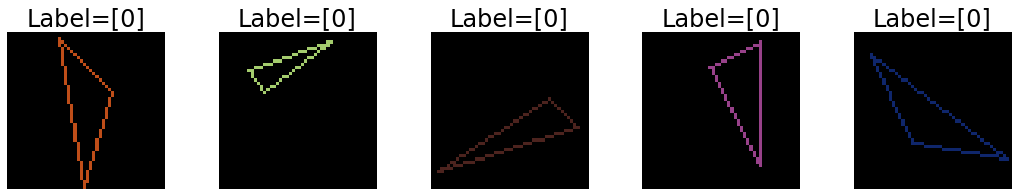

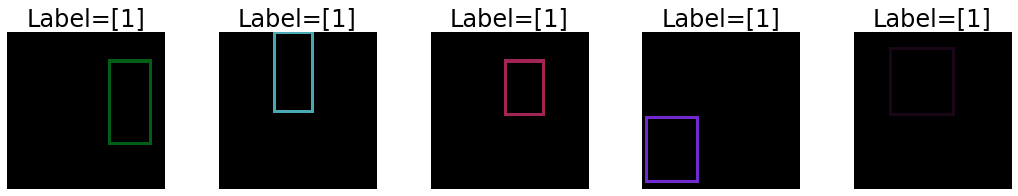

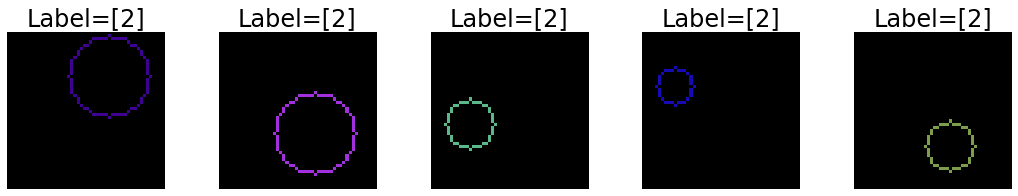

In [ ]:
max_label = 2
for i in range(max_label+1):
  indicies = create_manual_batch(i, shape_labels)
  tple = (np.take(shape_images, indicies, axis=0),np.take(shape_labels, indicies, axis=0))
  plot_batch(tple, row=1, col=5, channel_first=False)

### Shapes Augmantations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


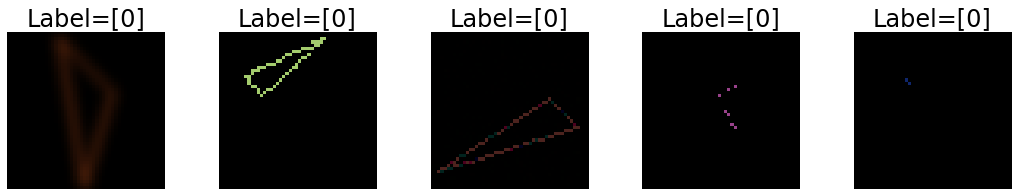

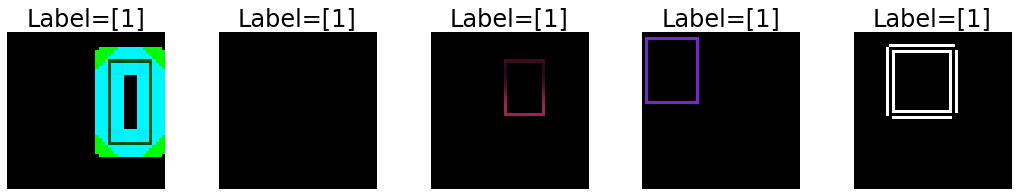

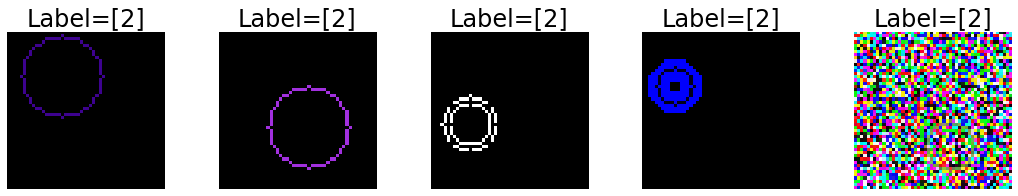

In [ ]:
AugUtils.d3_image = True
random_augmantation(shape_images)
max_label = 2
for i in range(max_label+1):
  indicies = create_manual_batch(i, shape_labels)
  tple = (np.take(shape_images, indicies, axis=0),np.take(shape_labels, indicies, axis=0))
  plot_batch(tple, row=1, col=5, channel_first=False)

## Split dataset to Train & Test

In [ ]:
imgs_train, imgs_test, labels_train, labels_test = train_test_split(shape_images, shape_labels, test_size=0.1, random_state=42)

# Conclusions:
* As you can see there are augmentations that match RGB color images and there are augmentations that match GRAY color images such as Gaussian noise.
* Although we have limited the shapes to be within the boundaries of the image, activating augmentations on them has moved them outside the boundaries of the image
* Split for test train & validation will be as we did and the train must perform another split for train & validation
* Performing a cutout on the shape essentially creates an identification of objects by omitting part of the image.
You can hide a circle / square / triangle part, all you have to do is activate the appropriate shape on the image.
Or, use the Tensorflow function - tfa.image.random_cutout

In [ ]:
print("""
$$$$$$$$\ $$\   $$\ $$$$$$$$\       $$$$$$$$\ $$\   $$\ $$$$$$$\  $$\ 
\__$$  __|$$ |  $$ |$$  _____|      $$  _____|$$$\  $$ |$$  __$$\ $$ |
   $$ |   $$ |  $$ |$$ |            $$ |      $$$$\ $$ |$$ |  $$ |$$ |
   $$ |   $$$$$$$$ |$$$$$\          $$$$$\    $$ $$\$$ |$$ |  $$ |$$ |
   $$ |   $$  __$$ |$$  __|         $$  __|   $$ \$$$$ |$$ |  $$ |\__|
   $$ |   $$ |  $$ |$$ |            $$ |      $$ |\$$$ |$$ |  $$ |    
   $$ |   $$ |  $$ |$$$$$$$$\       $$$$$$$$\ $$ | \$$ |$$$$$$$  |$$\ 
   \__|   \__|  \__|\________|      \________|\__|  \__|\_______/ \__|
""")


$$$$$$$$\ $$\   $$\ $$$$$$$$\       $$$$$$$$\ $$\   $$\ $$$$$$$\  $$\ 
\__$$  __|$$ |  $$ |$$  _____|      $$  _____|$$$\  $$ |$$  __$$\ $$ |
   $$ |   $$ |  $$ |$$ |            $$ |      $$$$\ $$ |$$ |  $$ |$$ |
   $$ |   $$$$$$$$ |$$$$$\          $$$$$\    $$ $$\$$ |$$ |  $$ |$$ |
   $$ |   $$  __$$ |$$  __|         $$  __|   $$ \$$$$ |$$ |  $$ |\__|
   $$ |   $$ |  $$ |$$ |            $$ |      $$ |\$$$ |$$ |  $$ |    
   $$ |   $$ |  $$ |$$$$$$$$\       $$$$$$$$\ $$ | \$$ |$$$$$$$  |$$\ 
   \__|   \__|  \__|\________|      \________|\__|  \__|\_______/ \__|

